In [2]:
from skimage import data
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'skimage'

Text(0.5, 1.0, 'Original image')

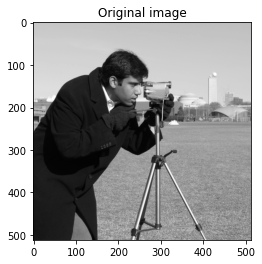

In [ ]:
# Load the image
img = data.camera()
X=np.array(img)
plt.imshow(X, cmap="gray")
plt.title("Original image")

In [ ]:
# Compute the SVD
U, s, Vt = svd(X,full_matrices=False)

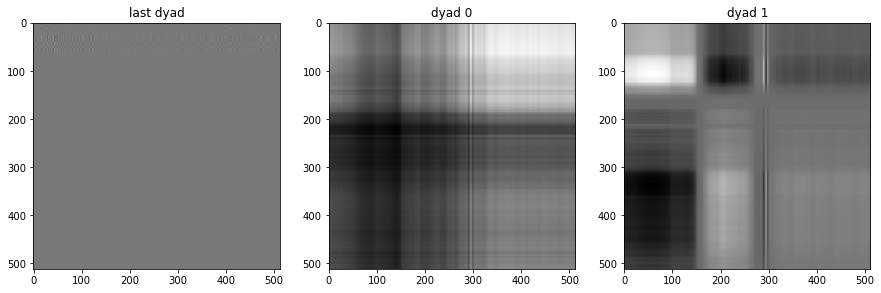

In [ ]:
# Visualize the first dyads
d=[-2,0,1]
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in d:
    plt.subplot(1,3,d.index(i)+1)
    Ai=U[:,i:i+1]@Vt[i:i+1,:]
    Ai*=s[0]
    plt.imshow(np.reshape(Ai, (512, 512)), cmap="gray")
    if i==-2:
        plt.title("last dyad")
    else:
        plt.title("dyad "+str(i))

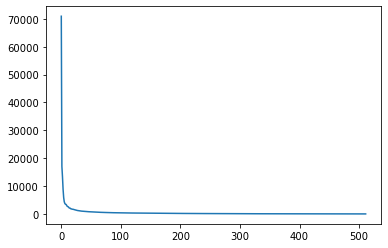

In [ ]:
# Plot the singular values
plt.plot(s)
plt.show()

Text(0.5, 1.0, 'k=511; Error=0.11962513539805864')

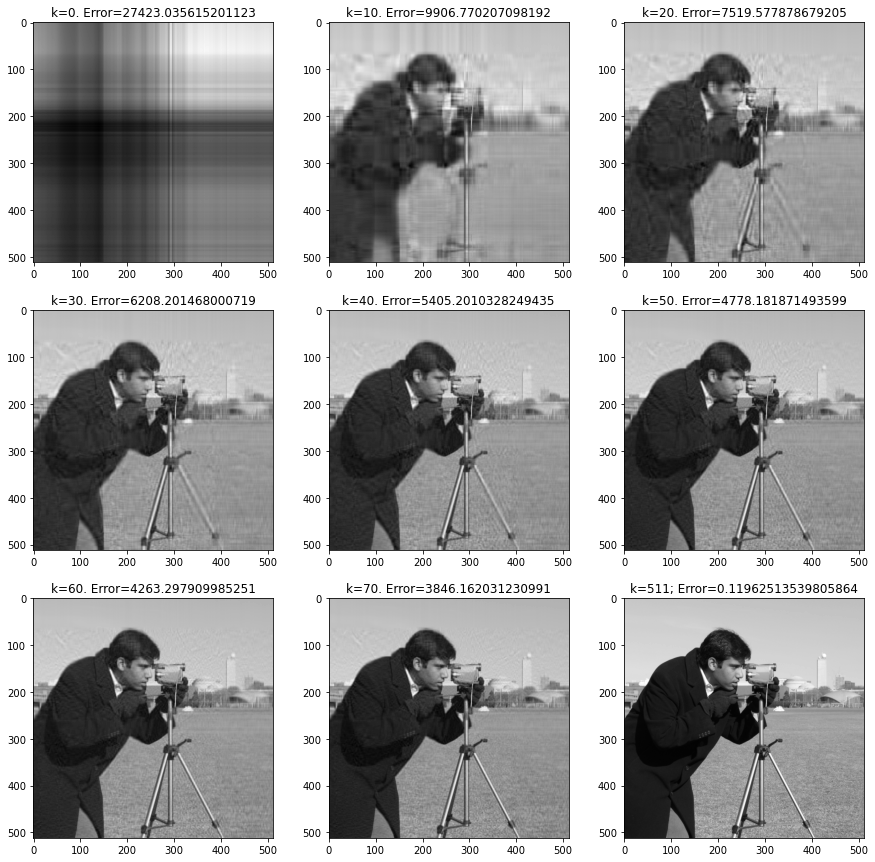

In [ ]:
# Visualize the k-rank approximation
k=512
sum=0
E=np.zeros((512,))
Ai=np.zeros((512,512))
fig, ax= plt.subplots(3,3, figsize=(15,15))
pi=0
pj=0
for i in range(k):
    Ai+=(U[:,i:i+1]@Vt[i:i+1,:])*s[i]
    E[i]=np.linalg.norm(X-Ai)
    if(i%10==0 and i<80):
        ax[pi][pj].imshow(np.reshape(Ai, (512, 512)), cmap="gray")
        ax[pi][pj].set_title(f"k={i}. Error={E[i]}")
        pj+=1
        if(pj==3):
            pj=0
            pi+=1
ax[2][2].imshow(np.reshape(Ai, (512, 512)), cmap="gray")
ax[2][2].set_title(f"k={i}; Error={E[i]}")

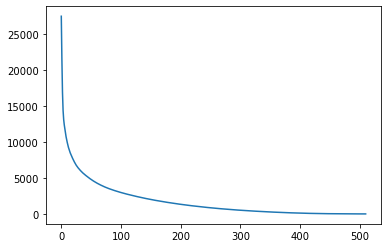

In [ ]:
# Plot the approximation error
err = []
for k in range(1, len(s)):
    err.append(np.linalg.norm(img - np.dot(U[:,:k]*s[:k],Vt[:k,:])))
plt.plot(err)
plt.show()

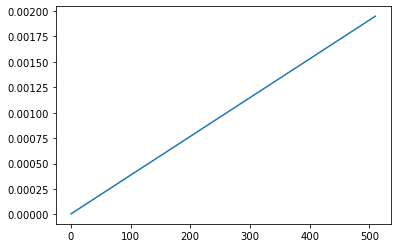

In [ ]:
# Plot the compression factor
comp_factor = [k/(img.shape[0]*img.shape[1]) for k in range(1,len(s))]
plt.plot(comp_factor)
plt.show()